can we create our own PowerBI tool to analyze live data

## Data Visualization

**1. Import and Explore:**
- a. Imports
    - Import packages
    - Import data in DataFrame

- b. Explore
    - Generate ProfileReport
    - Top 5 records
    - Shape
    - Summary 
    - Datatype
    - Duplicate
    - Missing
    - Correlation

**2. EDA:**
- a. Convert Data columns
    - Ordinal
    - Nominal
    - Discrete
    - Continuos

- b. Analysis
    - Univariate
        - Numerical
        - Categorical
    - Bivariate
        - Numerical vs Numerical
        - Numerical vs Categorical
        - Categorical vs Categorical
    - Multivariate
    - QQ Plots
    

### 1.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [6]:
df = pd.read_csv("./data/EasyVisa.csv")

**Generate a ProfileReport using ydata_profiling for analysis of data**

In [5]:
# %pip install pandas-profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df,title="Pandas profiling report")

In [7]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = pd.read_csv('./data/train.csv')

**Show Top 5 Records**

In [8]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset**

In [9]:
df.shape

(25480, 12)

**Summary of the dataset**

In [10]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Check Datatypes in the dataset**

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Are there duplicate values?**

In [12]:
df.duplicated().sum()

np.int64(0)

**Are there any missing values?**

In [13]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Relation with predicted colum**

In [14]:
# df.corr(numeric_only=True)['case_status']

## 2. EXPLORING DATA
### Converting data into different categories:
- Quality (nominal, ordinal) | nominal: male/female | ordinal: bad/average/good
- Quantity (discrete, continuos) | discrete: age/rank | continuos: weight/height

In [15]:
# Categorize the columns
def categorize_columns(df):
    nominal_columns = []
    ordinal_columns = []
    discrete_columns = []
    continuous_columns = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < df.shape[0] / 2:
                nominal_columns.append(column)
            else:
                # Assume it's a unique identifier
                nominal_columns.append(column)
        elif df[column].dtype in ['int64', 'int32']:
            if df[column].nunique() < 25:  # Arbitrary threshold
                ordinal_columns.append(column)
            else:
                discrete_columns.append(column)
        elif df[column].dtype in ['float64', 'float32']:
            continuous_columns.append(column)
        else:
            print(f"Warning: Column {column} has an unexpected data type: {df[column].dtype}")

    return nominal_columns, ordinal_columns, discrete_columns, continuous_columns

# Categorize the columns
nominal, ordinal, discrete, continuous = categorize_columns(df)
numeric_features = discrete + continuous
categorical_features = ordinal + nominal
predicted = 'case_status' # Fill it according to the given data

# Print the results
print("Nominal (categorical) columns:")
print(nominal)
print("\nOrdinal columns:")
print(ordinal)
print("\nDiscrete (quantitative) columns:")
print(discrete)
print("\nContinuous (quantitative) columns:")
print(continuous)

# Verify the categorization
all_columns = nominal + ordinal + discrete + continuous
missing_columns = set(df.columns) - set(all_columns)
extra_columns = set(all_columns) - set(df.columns)

if missing_columns:
    print(f"\nMissing columns: {missing_columns}")
if extra_columns:
    print(f"\nExtra columns: {extra_columns}")
if not missing_columns and not extra_columns:
    print("\nAll columns are correctly categorized.")

Nominal (categorical) columns:
['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']

Ordinal columns:
[]

Discrete (quantitative) columns:
['no_of_employees', 'yr_of_estab']

Continuous (quantitative) columns:
['prevailing_wage']

All columns are correctly categorized.


In [16]:
# proportion of count data on categorical columns
for col in nominal: 
    print(df[col].value_counts(normalize=True) * 100) # It will give proportion
    print('---------------------------')

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

## Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

**QQ-Plots to check it follows which distribution:** Points close to slope represents a good fit for that distribution

Here is a list of distributions you can use with `stats.probplot`

1. **`"norm"`**: **Normal Distribution** - Standard bell curve; assesses normality.
2. **`"uniform"`**: **Uniform Distribution** - Equal probability across a range; flat distribution.
3. **`"expon"`**: **Exponential Distribution** - Describes time between events in a Poisson process.
4. **`"lognorm"`**: **Log-Normal Distribution** - Data is log-normally distributed; useful for positively skewed data.
5. **`"gamma"`**: **Gamma Distribution** - Flexible distribution for positive data; shape parameter `a`.
6. **`"weibull_min"`**: **Weibull Distribution** - Describes reliability data; shape parameter `c`.
7. **`"beta"`**: **Beta Distribution** - Distribution of random variables limited to the interval [0, 1]; shape parameters `a` and `b`.
8. **`"t"`**: **T-Distribution** - Similar to normal distribution but with heavier tails; degrees of freedom `df`.
9. **`"chi2"`**: **Chi-Square Distribution** - Distribution of sum of squares of standard normal variables; degrees of freedom `df`.
10. **`"f"`**: **F-Distribution** - Ratio of two scaled chi-square distributions; degrees of freedom `dfn` and `dfd`.

Each distribution has its own parameters and is used for different types of data and analyses.

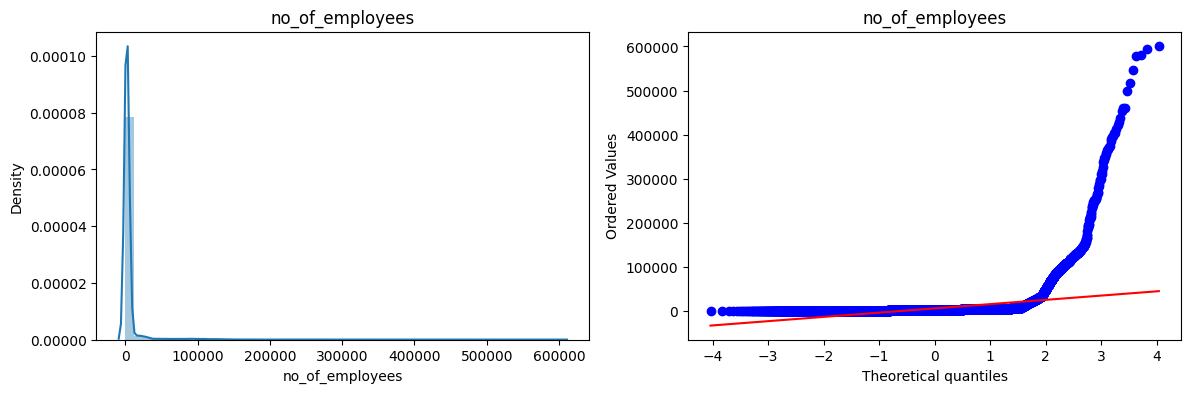

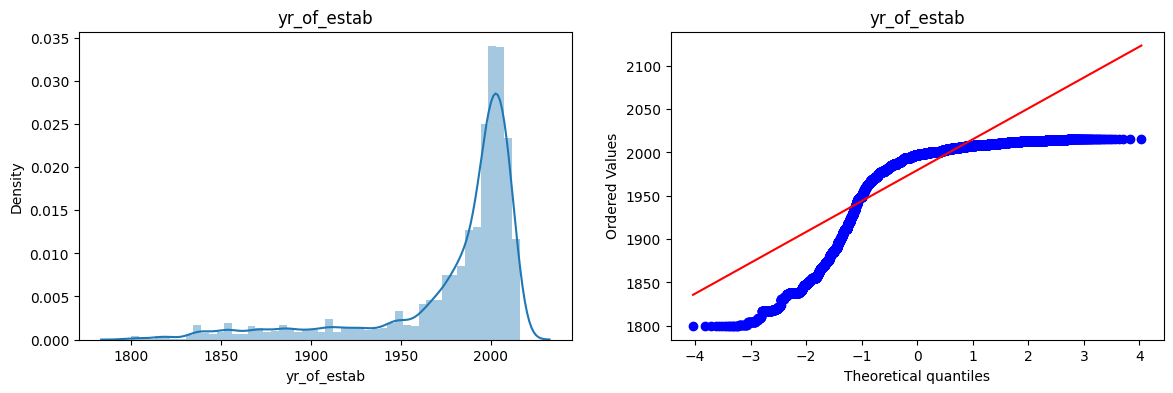

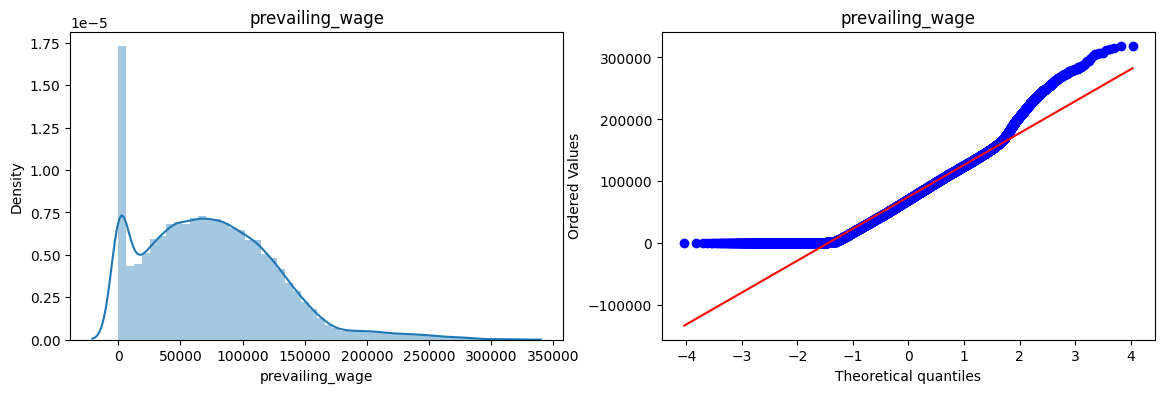

In [17]:
import scipy.stats as stats
# for col in X_train.columns:
for i in range(0, len(numeric_features)):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[numeric_features[i]])
    plt.title(numeric_features[i])

    plt.subplot(122)
    stats.probplot(df[numeric_features[i]], dist="norm", plot=plt)
    # stats.probplot(df[numeric_features[i]], dist="lognorm", s=1, plot=plt)
    # stats.probplot(df[numeric_features[i]], dist="f", s=(3, 5), plot=plt)
    
    plt.title(numeric_features[i])

    plt.show()

### Numerical Features

Skewness of no_of_employees  12.265260077708275
Skewness of yr_of_estab  -2.037301271676438
Skewness of prevailing_wage  0.7557760603032042


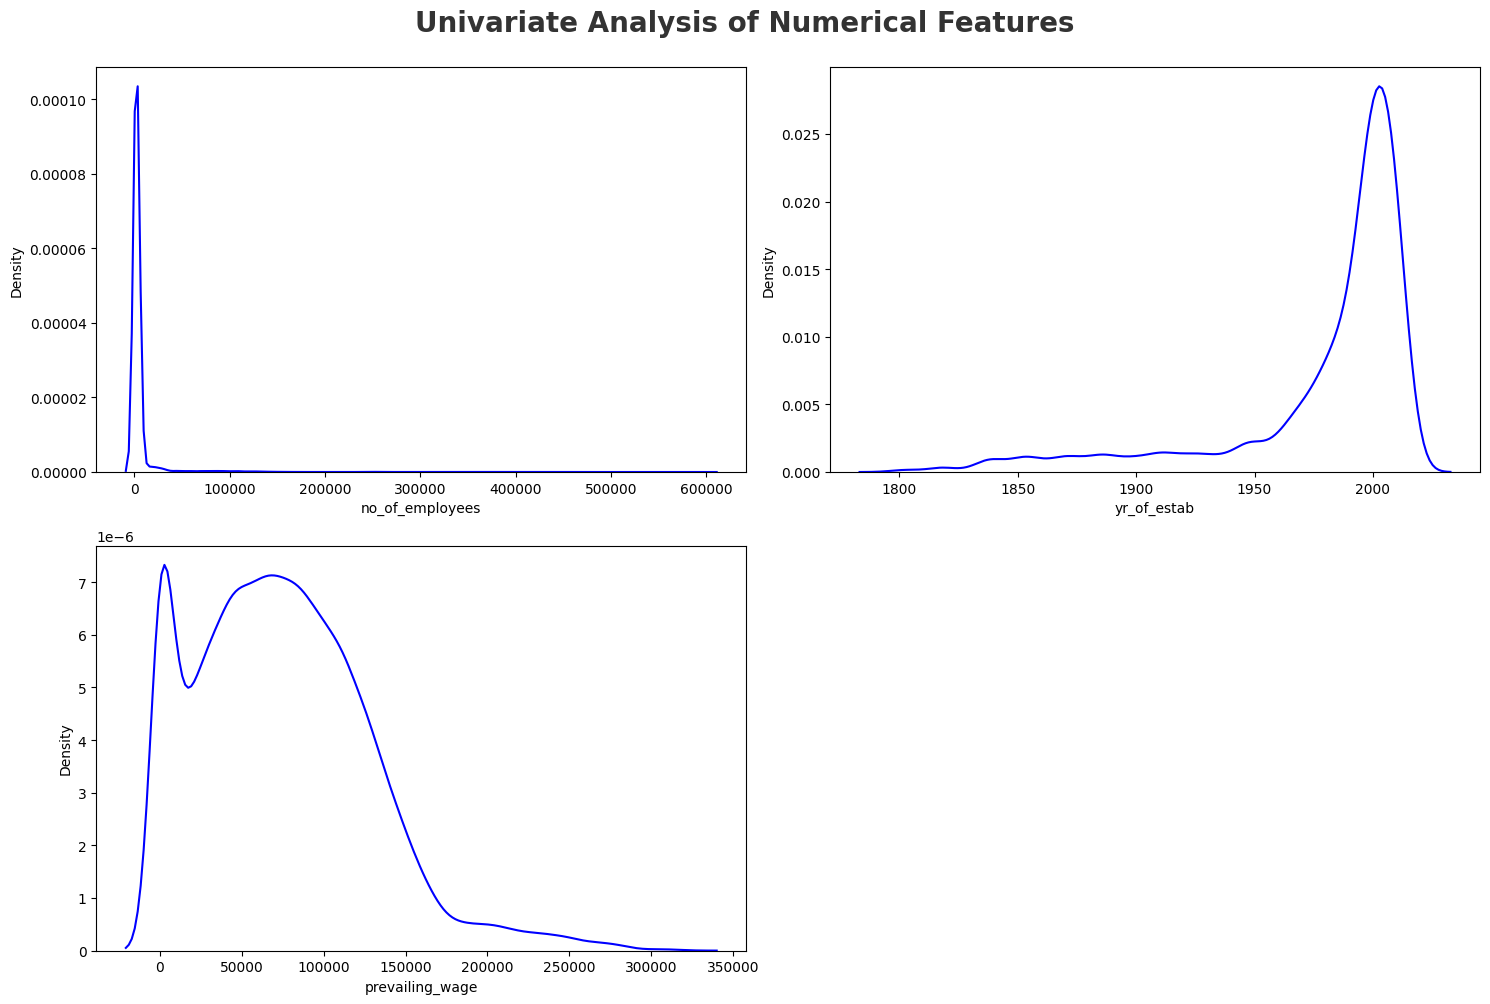

In [18]:
numeric_features = discrete + continuous
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    
    # 1. Distplot
    # sns.distplot(x=df[numeric_features[i]], color='blue')
    
    # 2. Kdeplot
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    
    # 3. Boxplot
    # sns.boxplot(x=df[numeric_features[i]], color='blue')
    
    print(f"Skewness of {numeric_features[i]} ", df[numeric_features[i]].skew())
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### Categorical Features

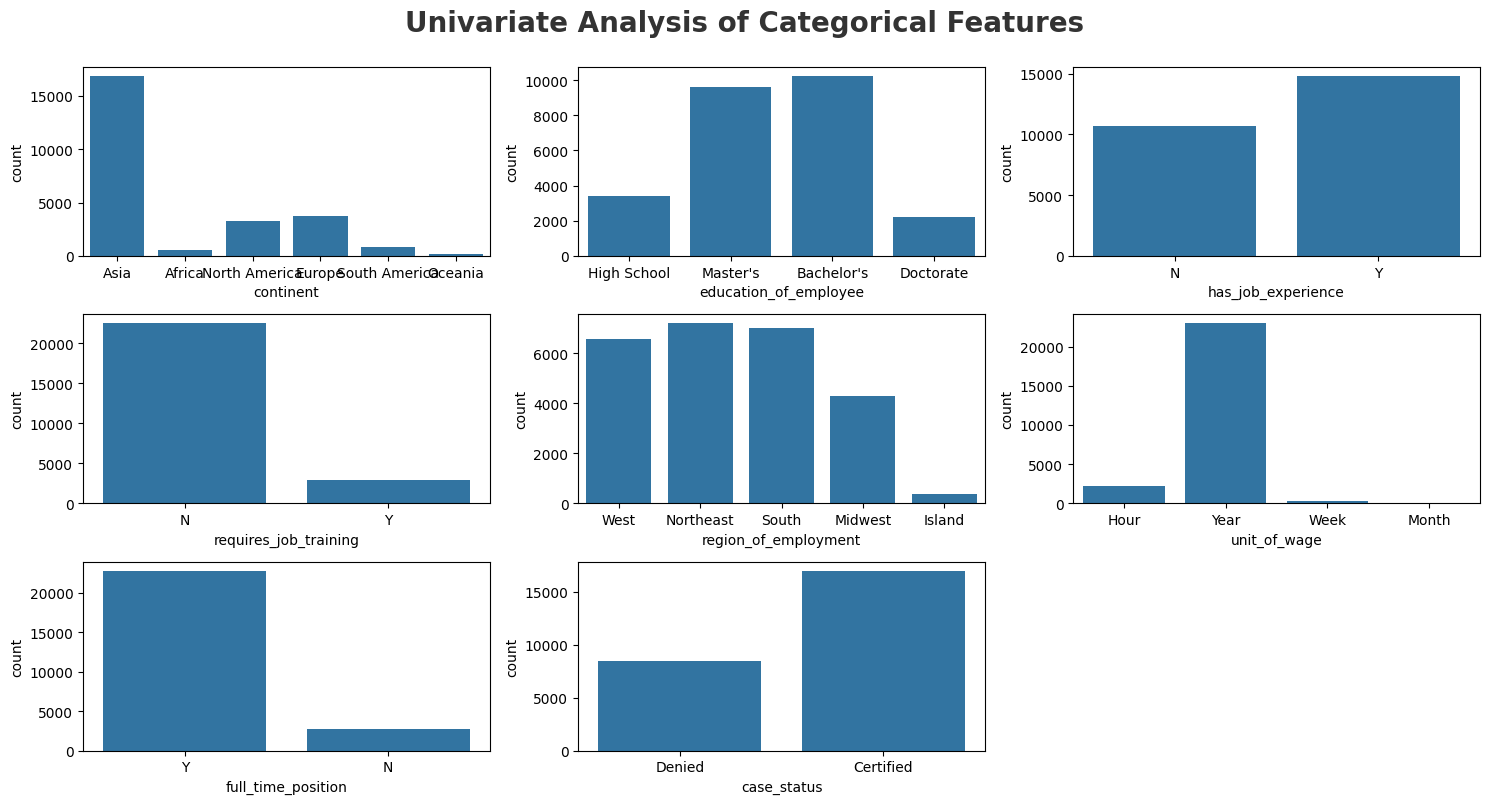

In [19]:
categorical_features = ordinal + nominal
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    
    # 1. Countplot
    sns.countplot(x=df[categorical_features[i]])
    
    # 2. Pieplot
    # df[categorical_features[i]].value_counts().plot(kind='pie',autopct='%.2f')
    
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

## Bivariate Analysis
* The term biivariate analysis refers to the analysis of two variables prefix “bi” means “two.” The purpose of bivariate analysis is to understand the relation of values for the two variable.

Other Type of Analysis are
* **Multivariate Analysis:** The analysis of two or more variables.

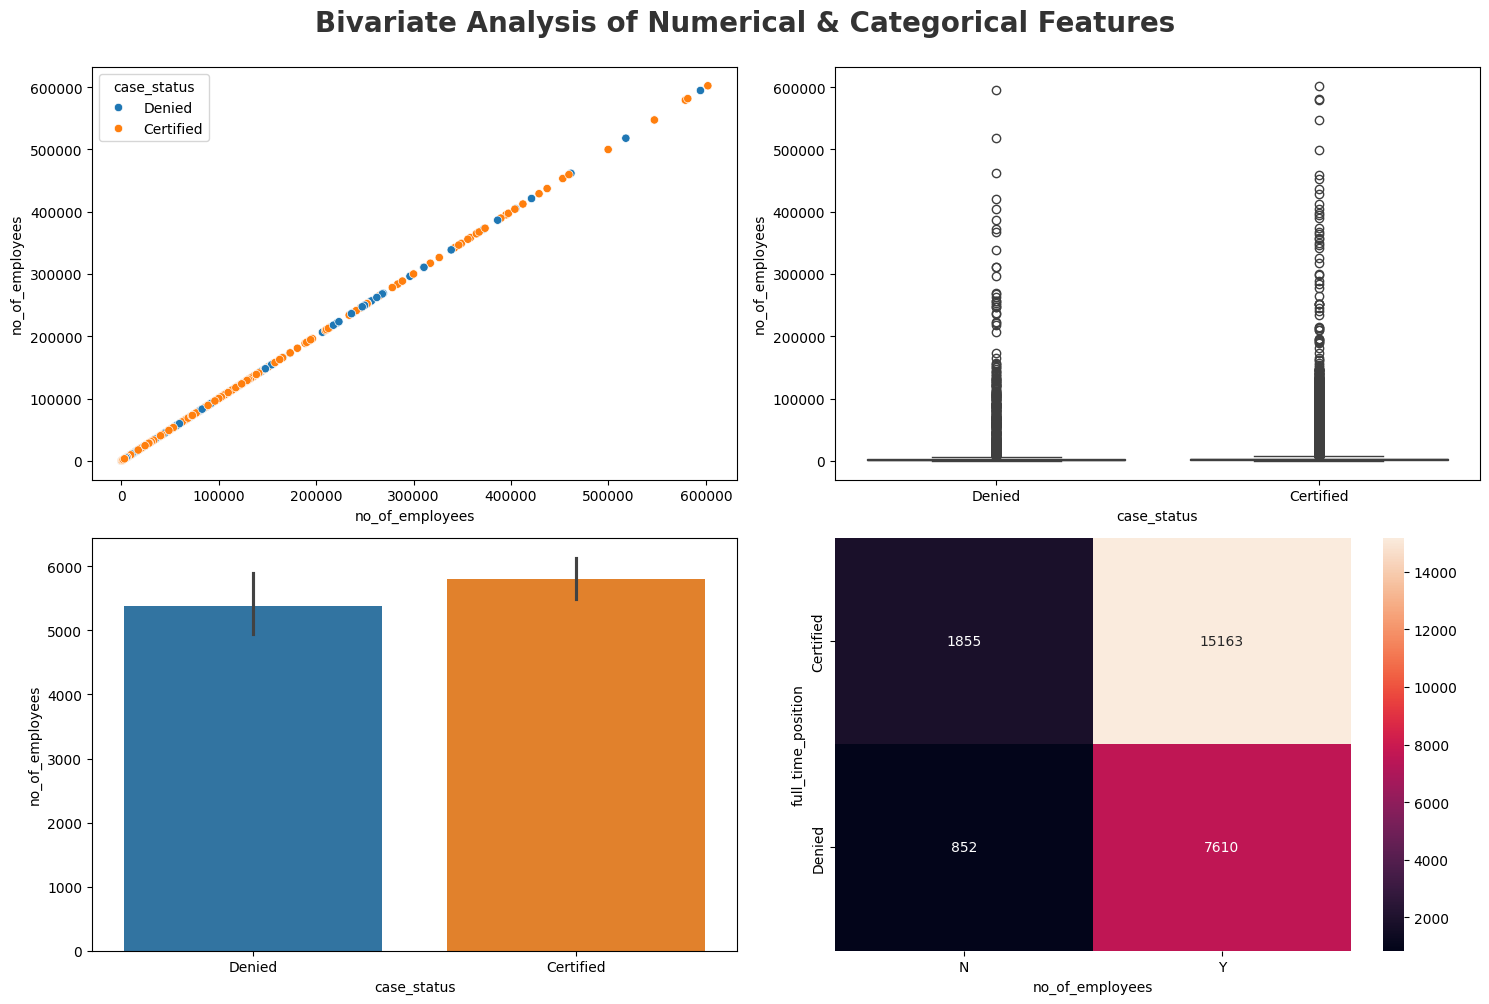

In [20]:
plt.figure(figsize=(15, 10))
plt.suptitle('Bivariate Analysis of Numerical & Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_length = len(numeric_features)
category_length = len(categorical_features)
i,j = np.random.randint(numeric_length, size=2)
i_,j_ = np.random.randint(category_length, size=2)

# 1. Numeric-Numeric
# a. Scatterplot
plt.subplot(2,2,1)
sns.scatterplot(x=df[numeric_features[i]],y=df[numeric_features[j]], hue=df[predicted])

# 2. Numeric-Categorical
# a. Boxplot
plt.subplot(2,2,2)
sns.boxplot(x=df[categorical_features[i_]],y=df[numeric_features[j]], hue=df[predicted])
# # b. Barplot
plt.subplot(2,2,3)
sns.barplot(x=df[categorical_features[i_]],y=df[numeric_features[j]], hue=df[predicted])

# # 3. Categorical-Categorical
# # a. Heatmap   
plt.subplot(2,2,4) 
# sns.heatmap(df.groupby([categorical_features[i], categorical_features[j]])[predicted].count().unstack(), annot=True, fmt='g')
sns.heatmap(pd.crosstab(df[categorical_features[i_]], df[categorical_features[j_]]), annot=True, fmt='g')

plt.xlabel(numeric_features[i])
plt.ylabel(categorical_features[j_]) # Changes respectively
plt.tight_layout()

**That's it for EDA now u can play with different combinations of graph and categories to analyse your data**